### Useful Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from iapws import IAPWS95
from iapws.iapws08 import _Tf, _Tb, _Triple
from iapws._iapws import _Sublimation_Pressure, _Melting_Pressure

### Phase Diagram

 Phase diagram for water with salinity 0.5 kg/kg


In [2]:
# Salinity parameters
S = 0.5    # kg_salt/kg_water
n_w = 1000/18.015      # Mole of water in 1 kg
x_w = n_w / (n_w + S)  # Approximate activity
x_w

0.9910729107563621

**Application of Raoult’s Law**

Raoult’s law for an ideal solution states that the vapor pressure of the solvent in a solution is proportional to its mole fraction in the liquid phase:

$$
P_{\text{sol}} \;=\; x_w \; P_{\text{puro}}
$$
donde:  
- $P_{\text{sol}}$ is the equilibrium vapor pressure of water in the brine.
- $x_w$ is the mole fraction of water in the mixture.  
- $P_{\text{puro}}$ is the pure-water equilibrium pressure at the same temperature (from IAPWS95 or the pure-ice sublimation pressure).




In [3]:
# Sublimation adjusted by Raoult
Ts_subl = np.linspace(60, 273.16, 200)
Ps_subl = x_w * np.array([_Sublimation_Pressure(T) for T in Ts_subl])

# Adjusted vapor curve
Ts_vap = np.linspace(273.16, 647.096, 200)
Ps_vap = x_w * np.array([IAPWS95(T=T, x=0).P for T in Ts_vap])

C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws95.py:175: RuntimeWarning: divide by zero encountered in scalar power
  DeltaBd = b*Delta**(b-1)*Deltad
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws95.py:175: RuntimeWarning: invalid value encountered in scalar multiply
  DeltaBd = b*Delta**(b-1)*Deltad
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws95.py:1638: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  rhoL, rhoG = fsolve(f, [rhoLo, rhoGo])
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws95.

In [4]:
# Melting and Boiling Lines

Pmin = _Triple(S)['Pt'] #Triple point
Pmax = 22.064 #Water critic poitn

Ps_range = np.logspace(np.log10(Pmin), np.log10(Pmax), 300)

Ts_freeze, Ps_freeze = [], []
Ts_boil, Ps_boil = [], []
for P in Ps_range:
    try:
        Ts_freeze.append(_Tf(P, S))
        Ps_freeze.append(P)

        Ts_boil.append(_Tb(P, S))
        Ps_boil.append(P)
    except:
        pass

C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\_iapws.py:136: UserWarning: Metastable ice in vapor region
  warnings.warn("Metastable ice in vapor region")
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws08.py:374: UserWarning: Incoming out of bound
  warnings.warn("Incoming out of bound")
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\_iapws.py:128: UserWarning: Metastable ice
  warnings.warn("Metastable ice")
C:\Users\Santiago\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\iapws\iapws08.py:485: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iter

Ih 251.165 273.16
III 251.166 256.164
V 256.165 273.15
VI 273.32 355
VII 355.1 647.096


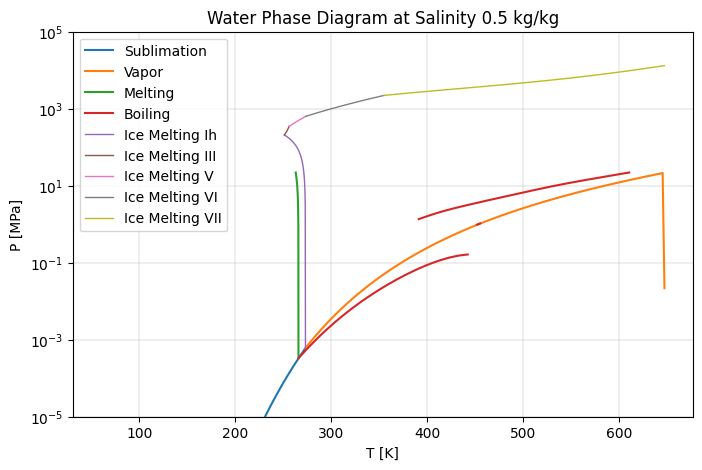

In [5]:
hielos = {
    "Ih":  (251.165, 273.16),
    "III": (251.166, 256.164),
    "V":   (256.165, 273.15),
    "VI":  (273.32,  355),
    "VII": (355.1,   647.096),
}

plt.figure(figsize=(8,5))
plt.plot(Ts_subl,   Ps_subl,    label='Sublimation')
plt.plot(Ts_vap,    Ps_vap,     label='Vapor')
plt.plot(Ts_freeze, Ps_freeze,   label='Melting')
plt.plot(Ts_boil,   Ps_boil,   label='Boiling')

# Fusiones de hielos puros
for ice, (T0, T1) in hielos.items():
    print(ice, T0, T1)
    Ts = np.linspace(T0, T1, 100)
    Ps = np.array([_Melting_Pressure(T, ice=ice) for T in Ts])
    plt.plot(Ts, Ps, lw=1,
            label=f'Ice Melting {ice}')

plt.yscale('log')
plt.ylim(1e-5, 1e5)
plt.xlabel('T [K]')
plt.ylabel('P [MPa]')
plt.title('Water Phase Diagram at Salinity 0.5 kg/kg')
plt.legend()
plt.grid(True, lw=0.3)
plt.show()

grafica de temperatura critica vs